# Sınıflandırma Modelleri-Problemleri- Gözetimli, Denetimli
* Veri setinde bulunan bağımlı değişkenin sınıflardan oluştuğu ddurumlarda kullanılan modelleme türüdür.
- Kadın-Erkek , Hasta-Hasta değil, Ödeyebilir-Ödeyemez
--------------
* Lojistik Regersyon
* KNN
* SVC
* Yapay Sinir Ağları
* CART
* Random Forest
* Gradient Boosting Machines
* LightGBM
* CatBoost
------------

# Lojistik Regresyon
* Amaç sınıflandrıma problemli için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır.
* Çoklu doğrusal regresyonun sınıflandırma problemlerine uyarlanmaış fakat ufak farklılıklara tabi tutulmuş bir versiyon olarak düşünülebilir.
-----------
* Bağımlı değişken kategoriktir.
* Adını bağımlı değişkene uygulanan logit dönüşümünden alır.
* Doğrusal regresyonda aranan varsayımlar burada aranmadığı için daha esnek kullanılabilirliği vardır.
* Bağımlı değişkenin 1 olarak tanımlanan değerinşn gerçekleşme olasılığı hesaplanır. Dolayısıyla bağımlı değişkenim alacağı değerler ile ilgilenilmez.
* Lojistik fonksiyonu sayesinde üretilen değerler 0-1 arasında olur.
-------
## Lojistik Dağılım Fonksiyonu
* Bağımsız değişken değerleri yerine girildiğinde, bağımlı değişkenin 1 olma olasılığı ile ilgileniyoruz !
### $\pi(x) = P(Y = 1 |X = x) = \frac{e^{(b_0 + b_1 x_1 + b_2 x_2 + ... + b_p x_p)}}{1 + e^{-(b_0 + b_1 x_1 + b_2 x_2 + ... + b_p x_p)}} $
----
* Lojistik Dağılım fonksiyonunun Odds (olma olasılığının, olmama olasılığına bölünmesi ile elde edilen olgu)'s:
## $ \frac{\pi(x)}{1 - \pi(x)}   $

----------------
* Lojistik Regresyon modeli: (ojistik Dağılım fonksiyonunun Odds'unun logaritmasını aldığımızda)
## $g(x) = ln \frac{\pi(x)}{1 - \pi(x)} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p$
------
* Bağımsız değişken değerleri geldiğinde bu bağımsız değişken değerlerine karşılık oluşabilecek olan bağımlı değişkenin değerlerini tahmin etmeye çalşımaktır. Yani RMSE'nin classification yansıması. Notasyon biraz değişmiş
* $l(\beta) = \sum_{i=1}^{N}\{y_{i}log~p(x_{i};\beta)+(1-y_{i})log(1-p(x_{i};\beta))\} $
* $= \sum_{i=1}^{N} (y_i B^{T} x_i - log(1+e^{T x_i}))$ 
* Elimizde gerçek değerler var, tahmin edilen değerler var. Bunların farklarını alıyoruz ve bu farkların minumum olmasını sağlayacak şekilde "$\beta$" katsayılarına ya da ağırlıklara "W" erişmeye çalışıyoruz. 

library

In [73]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df = pd.read_csv('diabetes.csv')

In [16]:
df.isnull().value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age    Outcome
False        False    False          False          False    False  False                     False  False      768
dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [19]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Model ve tahmin
* amacımız şeker hastalığı tahmin modeli geliştirmek

In [49]:
y= df['Outcome']
X= df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [33]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


In [24]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [36]:
loj_model = LogisticRegression(solver='liblinear').fit(X,y)

In [38]:
loj_model.intercept_

array([-5.89175767])

In [39]:
loj_model.coef_

array([[ 1.17053857e-01,  2.83878105e-02, -1.68895448e-02,
         7.55295336e-04, -6.42779727e-04,  5.97631361e-02,
         6.77641093e-01,  7.23986346e-03]])

In [50]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [51]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [52]:
y_pred=loj_model.predict(X)

In [53]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [57]:
accuracy_score(y,y_pred)

0.7747395833333334

In [59]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [60]:
loj_model.predict_proba(X)[0:10]

array([[0.35040373, 0.64959627],
       [0.91702224, 0.08297776],
       [0.22474194, 0.77525806],
       [0.92139118, 0.07860882],
       [0.16722986, 0.83277014],
       [0.7989895 , 0.2010105 ],
       [0.88019422, 0.11980578],
       [0.27812572, 0.72187428],
       [0.3206045 , 0.6793955 ],
       [0.92273361, 0.07726639]])

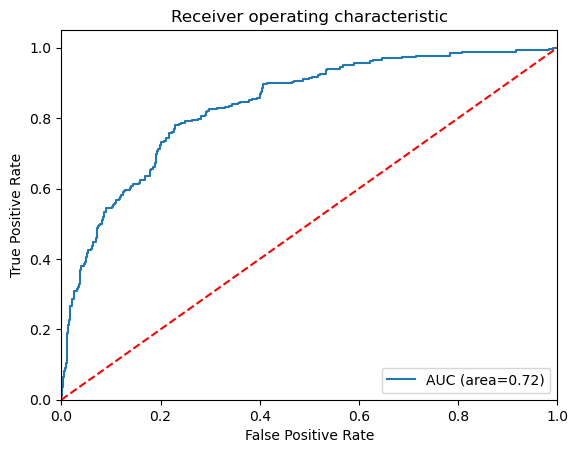

In [62]:
logit_roc_auc = roc_auc_score(y,loj_model.predict(X))
fpr,tpr,thresholds = roc_curve(y,loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='AUC (area=%0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

tuning kısmı

In [66]:
y= df['Outcome']
X= df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [68]:
loj_model = LogisticRegression(solver='liblinear').fit(X_train,y_train)

In [69]:
y_pred= loj_model.predict(X_test)

In [70]:
print(accuracy_score(y_test,y_pred))

0.7532467532467533


In [78]:
(cross_val_score(loj_model,X_test,y_test, cv = 10)).mean()

0.7704710144927536